# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

> **Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview

This notebook explores Dandiset 000617 ([link](https://dandiarchive.org/dandiset/000617/0.250312.0130)), which contains two-photon calcium imaging data from the Allen Institute's Openscope project investigating sequence learning in the mouse visual cortex.

The experiment investigates how mice learn temporal sequences of natural movie clips. Mice passively viewed sequences of 2-second movie clips (labeled 'A', 'B', 'C') along with gray screens ('X'). After initial random presentations, mice were trained on a repeating sequence (ABCABC...) to study how neural responses change with sequence learning.

The data includes:
- Two-photon calcium imaging from multiple visual cortex areas (V1, LM, AM, PM)
- Eye tracking data
- Running speed measurements
- Stimulus presentation timing
- Cell segmentation and fluorescence traces

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")

# Get URL for an example NWB file
url = next(dandiset.get_assets_by_glob("sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb")).download_url

# Load NWB file using streaming
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring Neural Activity Data

Let's examine the calcium imaging data, which includes both raw fluorescence and processed ΔF/F traces.

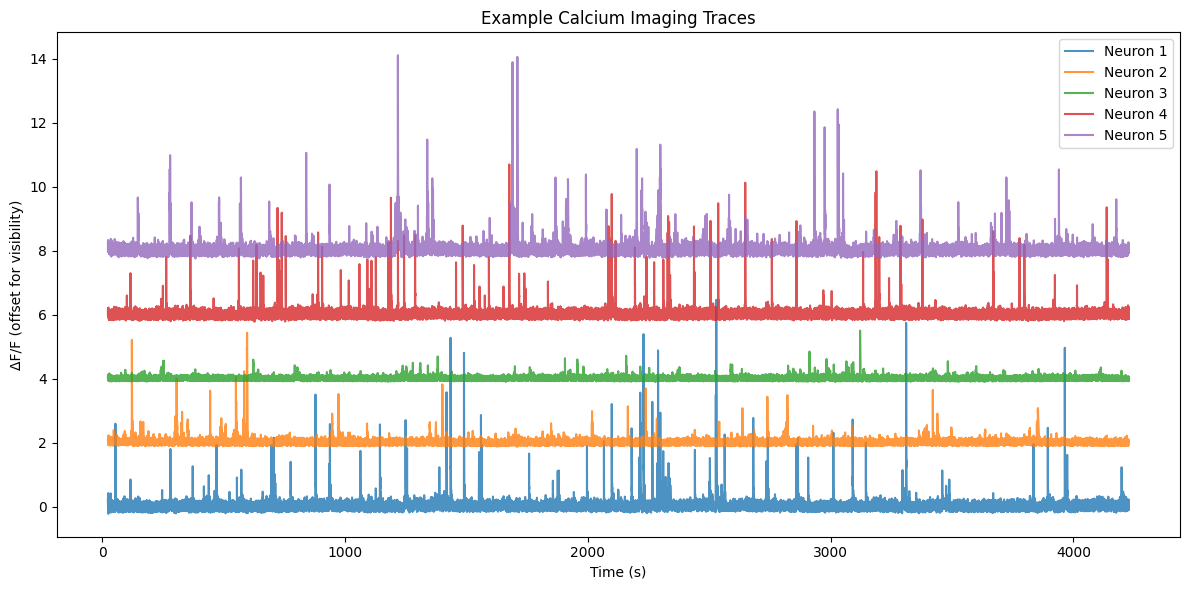

In [3]:
# Get dF/F traces from the ophys processing module
dff = nwb.processing['ophys'].data_interfaces['dff']
dff_traces = dff.roi_response_series['traces']

# Plot dF/F traces for a few example neurons
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot first 5 neurons
    plt.plot(dff_traces.timestamps[:], dff_traces.data[:, i] + i*2, alpha=0.8, label=f'Neuron {i+1}')

plt.xlabel('Time (s)')
plt.ylabel('ΔF/F (offset for visibility)')
plt.title('Example Calcium Imaging Traces')
plt.legend()
plt.tight_layout()
plt.show()

## Analyzing Behavioral Data

The dataset includes both running speed and eye tracking data.

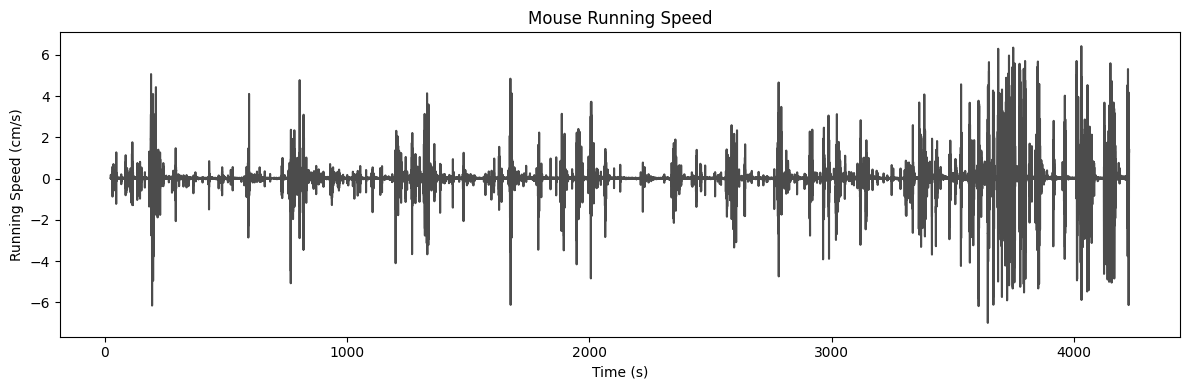

In [4]:
# Get running speed data
running_speed = nwb.processing['running'].data_interfaces['speed']

# Plot running speed
plt.figure(figsize=(12, 4))
plt.plot(running_speed.timestamps[:], running_speed.data[:], 'k-', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Mouse Running Speed')
plt.tight_layout()
plt.show()

## Eye Tracking Analysis

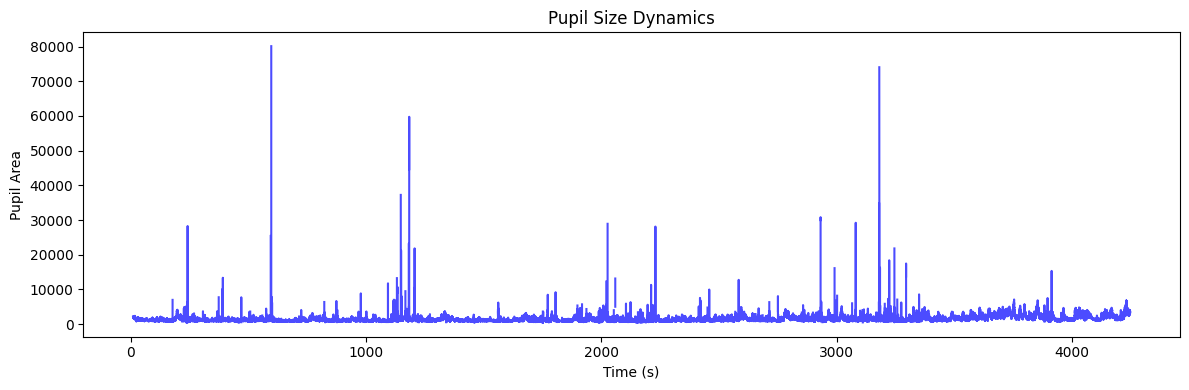

In [5]:
# Get pupil tracking data
eye_tracking = nwb.acquisition['EyeTracking']
pupil_area = eye_tracking.pupil_tracking.area

# Plot pupil area over time
plt.figure(figsize=(12, 4))
plt.plot(eye_tracking.pupil_tracking.timestamps[:], pupil_area[:], 'b-', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Pupil Area')
plt.title('Pupil Size Dynamics')
plt.tight_layout()
plt.show()

## Stimulus Information

Let's examine the timing of different movie clip presentations.

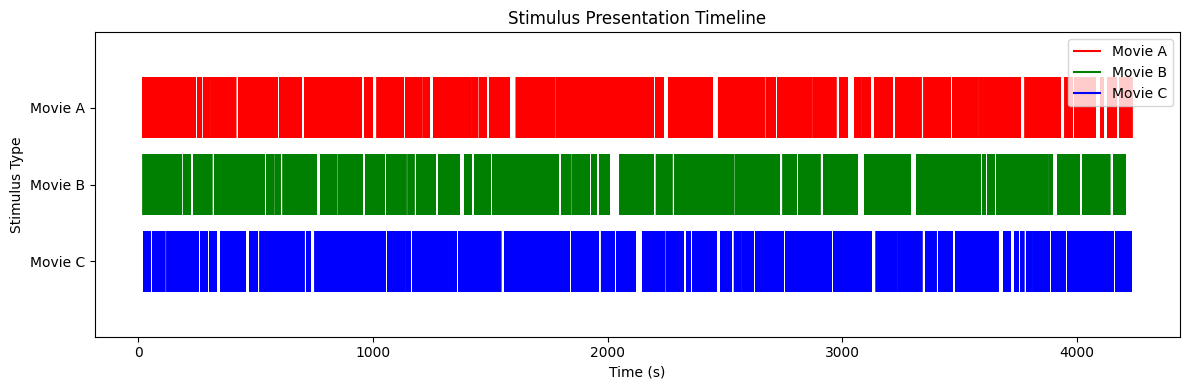

In [6]:
# Get stimulus presentation intervals
movie_a = nwb.intervals['movie_clip_A_presentations']
movie_b = nwb.intervals['movie_clip_B_presentations']
movie_c = nwb.intervals['movie_clip_C_presentations']

# Create raster plot of stimulus presentations
plt.figure(figsize=(12, 4))

# Plot timing of each stimulus type
plt.eventplot(movie_a.start_time[:], lineoffsets=3, linelengths=0.8, color='r', label='Movie A')
plt.eventplot(movie_b.start_time[:], lineoffsets=2, linelengths=0.8, color='g', label='Movie B')
plt.eventplot(movie_c.start_time[:], lineoffsets=1, linelengths=0.8, color='b', label='Movie C')

plt.ylabel('Stimulus Type')
plt.xlabel('Time (s)')
plt.yticks([1, 2, 3], ['Movie C', 'Movie B', 'Movie A'])
plt.title('Stimulus Presentation Timeline')
plt.legend()
plt.tight_layout()
plt.show()

## Motion Correction Quality

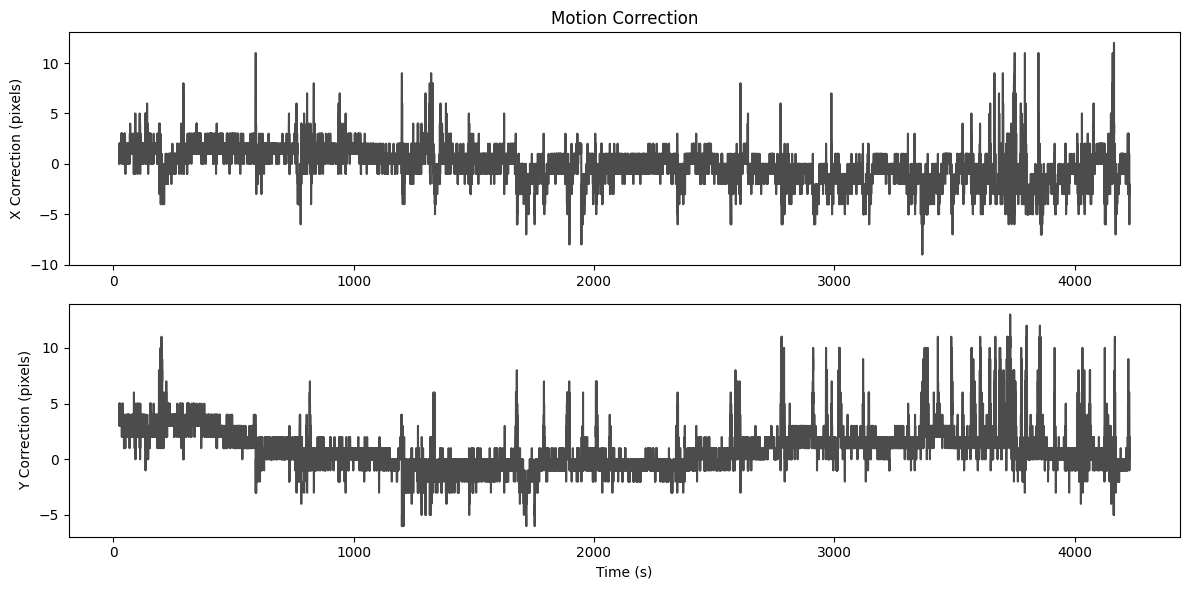

In [7]:
# Get motion correction data
motion_x = nwb.processing['ophys'].data_interfaces['ophys_motion_correction_x']
motion_y = nwb.processing['ophys'].data_interfaces['ophys_motion_correction_y']

# Plot motion correction
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(motion_x.timestamps[:], motion_x.data[:], 'k-', alpha=0.7)
plt.ylabel('X Correction (pixels)')
plt.title('Motion Correction')

plt.subplot(212)
plt.plot(motion_y.timestamps[:], motion_y.data[:], 'k-', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Y Correction (pixels)')
plt.tight_layout()
plt.show()

## Next Steps

This dataset enables various analyses:
1. Compare neural responses to expected vs unexpected sequences
2. Investigate how running speed affects visual responses
3. Study pupil dynamics during sequence learning
4. Analyze motion correction quality and its impact on neural signals
5. Compare responses across different visual areas

The NWB file structure makes it easy to access aligned behavioral and neural data for comprehensive analyses.